In [20]:
from pathlib import Path

import folium
import pandas
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# TODO whole overlapping period?

# U for Uber, T for T4c, O for OpenStreetMap
UBASEPATH = Path("/iarai/public/t4c/uber")
TBASEPATH = Path("/iarai/public/t4c/data_pipeline/release20221028_historic_uber")
OBASEPATH = Path("/iarai/public/t4c/osm")

In [21]:
highway_ordering = [
    "motorway",
    "motorway_link",
    "trunk",
    "trunk_link",
    "primary",
    "primary_link",
    "secondary",
    "secondary_link",
    "tertiary",
    "tertiary_link",
    "unclassified",
    "residential",
    "living_street",
    "service",
    "cycleway",
    "road",
    "construction",
]

In [22]:
plt.rcParams["axes.labelsize"] = 18

In [23]:
simplified_filter = lambda hw: hw not in ["residential", "living_street", "service", "road"]

In [24]:
def osm_color_palette():
    for c in ["#e892a2", "#e892a2", "#f9b29c", "#f9b29c", "#fcd6a4", "#fcd6a4", "#f7fabf", "#f7fabf"] + ["white"] * 99:
        yield c

In [25]:
df_barcelona = pd.read_parquet(f"barcelona_utcounts.parquet")
df_barcelona

,gkey,u,v,osmid,speed_kph,maxspeed,highway,oneway,lanes,tunnel,...,y_u_u,node_id_v_u,x_v_u,y_v_u,in_bb_u,count_u,speed_kph_mean,density_u,density_diff,sort_key
4695,1771334963_242934130_294049053,1771334963,242934130,294049053,80.0,80,motorway,,,,...,41.336557,242934130,2.099287,41.337590,True,0.0,NaN,0.000000,0.971429,0
1516,206346586_209106801_180274902,206346586,209106801,180274902,90.0,,motorway,,,,...,41.290874,209106801,2.002229,41.288638,True,0.0,NaN,0.000000,0.957143,0
5453,4353325973_206343940_19918156,4353325973,206343940,19918156,120.0,120,motorway,,,,...,41.301636,206343940,2.020845,41.299651,True,0.0,NaN,0.000000,0.928571,0
1552,208606457_2518375292_294713039,208606457,2518375292,294713039,80.0,80,motorway,,,,...,41.339122,2518375292,2.100841,41.338940,True,0.0,NaN,0.000000,0.914286,0
1634,215752952_209108780_19920168,215752952,209108780,19920168,90.0,,motorway,,,,...,41.285258,209108780,1.996582,41.284962,True,0.0,NaN,0.000000,0.928571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,1695282631_1695282667_157321756,1695282631,1695282667,157321756,30.0,30,living_street,,,,...,41.429620,1695282667,2.167435,41.429808,True,0.0,NaN,0.000000,0.085714,12
484,3236553582_442540239_116343002,3236553582,442540239,116343002,10.0,10,living_street,,,,...,41.393843,442540239,2.162863,41.394052,True,0.0,NaN,0.000000,0.814286,12
4219,3236553566_442540242_295281243,3236553566,442540242,295281243,10.0,10,living_street,,,,...,41.395651,442540242,2.160671,41.395833,True,1.0,8.346,0.006993,0.721578,12
2866,429572903_5301259039_548762348,429572903,5301259039,548762348,30.0,30,living_street,,,,...,41.450887,5301259039,2.220328,41.450744,True,2.0,26.247,0.013986,-0.013986,12


In [26]:
df_berlin = pd.read_parquet(f"berlin_utcounts.parquet")
df_berlin

,gkey,u,v,osmid,speed_kph,maxspeed,highway,oneway,lanes,tunnel,...,y_u_u,node_id_v_u,x_v_u,y_v_u,in_bb_u,count_u,speed_kph_mean,density_u,density_diff,sort_key
9636,267282985_260479469_22762377,267282985,260479469,22762377,80.0,80,motorway,,,,...,52.427128,260479469,13.517799,52.427687,True,175.0,82.663,0.625000,0.375000,0
12857,1638722796_26906825_407071532,1638722796,26906825,407071532,60.0,60,motorway,,,,...,52.457768,26906825,13.323222,52.456599,True,8.0,66.782,0.028571,0.971429,0
12862,1639697686_26906828_151145585,1639697686,26906828,151145585,80.0,80,motorway,,,,...,52.457998,26906828,13.325444,52.458179,True,4.0,77.176,0.014286,0.985714,0
12863,1641539210_270183173_151329651,1641539210,270183173,151329651,80.0,80,motorway,,,,...,52.390795,270183173,13.526817,52.389431,True,2.0,89.325,0.007143,0.992857,0
16129,5755822653_26906602_607319860,5755822653,26906602,607319860,40.0,40,motorway,,,,...,52.454914,26906602,13.320188,52.454735,True,1.0,21.071,0.003571,0.996429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3357,1293378213_26785760_4515856,1293378213,26785760,4515856,50.0,,living_street,,,,...,52.513577,26785760,13.294465,52.513426,True,1.0,20.440,0.003571,0.667857,12
7748,29787477_5486309058_570662585,29787477,5486309058,570662585,50.0,,living_street,,,,...,52.499254,5486309058,13.444226,52.497998,True,0.0,NaN,0.000000,0.557143,12
15122,3792048747_1846908923_203910789,3792048747,1846908923,203910789,50.0,,living_street,,,,...,52.530485,1846908923,13.334193,52.530578,True,3.0,12.021,0.010714,0.575000,12
10286,297357680_297357794_27102690,297357680,297357794,27102690,50.0,50,construction,,,,...,52.466358,297357794,13.458269,52.466491,True,74.0,39.457,0.264286,0.735714,16


In [27]:
df_london = pd.read_parquet(f"london_utcounts.parquet")
df_london

,gkey,u,v,osmid,speed_kph,maxspeed,highway,oneway,lanes,tunnel,...,y_u_u,node_id_v_u,x_v_u,y_v_u,in_bb_u,count_u,speed_kph_mean,density_u,density_diff,sort_key
17962,308790_413426000_178231248,308790,413426000,178231248,112.7,70 mph,motorway,,,,...,51.342041,413426000,0.634065,51.340291,False,0.0,NaN,0.000000,0.000000,0
232814,6295975661_104484_672337101,6295975661,104484,672337101,112.7,70 mph,motorway,,,,...,51.723750,104484,-0.387066,51.721360,False,302.0,108.850930,0.974194,-0.974194,0
172873,506311438_506311444_41399338,506311438,506311444,41399338,112.7,70 mph,motorway,,,,...,51.499751,506311444,-0.704361,51.499556,False,285.0,80.594138,0.919355,-0.919355,0
172038,472313005_472313008_39428020,472313005,472313008,39428020,112.7,70 mph,motorway,,,,...,51.427499,472313008,0.238887,51.427170,False,70.0,100.097729,0.225806,-0.225806,0
72756,26220462_1249494085_4498719,26220462,1249494085,4498719,112.7,70 mph,motorway,,,,...,51.386827,1249494085,0.190599,51.383941,False,4.0,28.903746,0.012903,-0.012903,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162318,298706441_298706418_42960329,298706441,298706418,42960329,33.6,,service,,,,...,51.563549,298706418,0.500252,51.562790,False,0.0,NaN,0.000000,0.000000,13
113482,1578749527_58488561_492343669,1578749527,58488561,492343669,32.2,,cycleway,,,,...,51.654599,58488561,-0.405956,51.654446,False,0.0,NaN,0.000000,0.000000,14
225066,4346458075_4376910559_436772431,4346458075,4376910559,436772431,52.8,,road,,,,...,51.630826,4376910559,-0.081751,51.630805,True,3.0,20.923029,0.009677,0.433180,15
225141,4376910562_4346458075_439987200,4376910562,4346458075,439987200,52.8,,road,,,,...,51.630883,4346458075,-0.081328,51.630826,True,1.0,17.152346,0.003226,0.511060,15


In [28]:
df_london.columns

Index(['gkey', 'u', 'v', 'osmid', 'speed_kph', 'maxspeed', 'highway', 'oneway',
       'lanes', 'tunnel', 'length_meters', 'geometry', 'name', 'node_id',
       'x_u', 'y_u', 'node_id_v', 'x_v', 'y_v', 'in_bb', 'count_t',
       'median_speed_kph', 'mean_volume', 'density_t', 'osmid_u',
       'speed_kph_u', 'maxspeed_u', 'highway_u', 'oneway_u', 'lanes_u',
       'tunnel_u', 'length_meters_u', 'name_u', 'node_id_u', 'x_u_u', 'y_u_u',
       'node_id_v_u', 'x_v_u', 'y_v_u', 'in_bb_u', 'count_u', 'speed_kph_mean',
       'density_u', 'density_diff', 'sort_key'],
      dtype='object')

In [29]:
nl = "\\\\ \\arrayrulecolor{Grey0!60!RoyalBlue3}\\midrule[0.05pt]"

In [30]:
print(f"num edges & {len(df_barcelona)} & {len(df_berlin)} & {len(df_london)} \\\\")
print(nl)
for lb, ub in [(-1, -0.6), (-0.6, -0.2), (-0.2, 0.2), (0.2, 0.6), (0.6, 1.0)]:
    s = f"edge coverage ({lb},{ub}]"
    for city, df in [("barcelona", df_barcelona), ("berlin", df_berlin), ("london", df_london)]:
        l = len(df[(df["density_diff"] > lb) & (df["density_diff"] <= ub)])
        s += f" & {l} ({l/len(df)*100:.2f}\%)"
    print(s)
    print(nl)
print("\\\\ \\arrayrulecolor{black} \midrule")
print(
    f"num edges bb & {len(df_barcelona[df_barcelona['in_bb']==True])} & {len(df_berlin[df_berlin['in_bb']==True])} & {len(df_london[df_london['in_bb']==True])}"
)
print(nl)
for lb, ub in [(-1, -0.6), (-0.6, -0.2), (-0.2, 0.2), (0.2, 0.6), (0.6, 1.0)]:
    s = f"edge coverage bb ({lb},{ub}]"
    for city, df in [("barcelona", df_barcelona), ("berlin", df_berlin), ("london", df_london)]:
        df = df[df["in_bb"] == True]
        l = len(df[(df["density_diff"] > lb) & (df["density_diff"] <= ub)])
        s += f" & {l} ({l/len(df)*100:.2f}\%)"
    print(s)
    print(nl)

num edges & 5943 & 16279 & 234308 \\
\\ \arrayrulecolor{Grey0!60!RoyalBlue3}\midrule[0.05pt]
edge coverage (-1,-0.6] & 0 (0.00\%) & 0 (0.00\%) & 5756 (2.46\%)
\\ \arrayrulecolor{Grey0!60!RoyalBlue3}\midrule[0.05pt]
edge coverage (-0.6,-0.2] & 0 (0.00\%) & 0 (0.00\%) & 15563 (6.64\%)
\\ \arrayrulecolor{Grey0!60!RoyalBlue3}\midrule[0.05pt]
edge coverage (-0.2,0.2] & 545 (9.17\%) & 1043 (6.41\%) & 129948 (55.46\%)
\\ \arrayrulecolor{Grey0!60!RoyalBlue3}\midrule[0.05pt]
edge coverage (0.2,0.6] & 2891 (48.65\%) & 1800 (11.06\%) & 54134 (23.10\%)
\\ \arrayrulecolor{Grey0!60!RoyalBlue3}\midrule[0.05pt]
edge coverage (0.6,1.0] & 2507 (42.18\%) & 13436 (82.54\%) & 27947 (11.93\%)
\\ \arrayrulecolor{Grey0!60!RoyalBlue3}\midrule[0.05pt]
\\ \arrayrulecolor{black} \midrule
num edges bb & 5943 & 16229 & 136138
\\ \arrayrulecolor{Grey0!60!RoyalBlue3}\midrule[0.05pt]
edge coverage bb (-1,-0.6] & 0 (0.00\%) & 0 (0.00\%) & 45 (0.03\%)
\\ \arrayrulecolor{Grey0!60!RoyalBlue3}\midrule[0.05pt]
edge coverage

In [31]:
df_edges_barcelona = pd.read_parquet("/iarai/public/t4c/data_pipeline/release20221026_residential_unclassified/2021/road_graph/london/road_graph_edges.parquet")
df_edges_london = pd.read_parquet("/iarai/public/t4c/data_pipeline/release20221026_residential_unclassified/2021/road_graph/london/road_graph_edges.parquet")
df_edges_berlin = pd.read_parquet("/iarai/public/t4c/data_pipeline/release20221026_residential_unclassified/2021/road_graph/berlin/road_graph_edges.parquet")
len(df_edges_london)
print(f"num edges mcswts & {len(df_edges_barcelona)} & {len(df_edges_berlin)} & {len(df_edges_london)}")
print(nl)

num edges mcswts & 271075 & 88882 & 271075
\\ \arrayrulecolor{Grey0!60!RoyalBlue3}\midrule[0.05pt]


In [32]:
df_barcelona["city"] = "Barcelona"
df_berlin["city"] = "Berlin"
df_london["city"] = "London"

df_all = pd.concat([df_barcelona, df_berlin, df_london])

In [33]:
df_london.groupby("highway").count()

,gkey,u,v,osmid,speed_kph,maxspeed,oneway,lanes,tunnel,length_meters,...,node_id_v_u,x_v_u,y_v_u,in_bb_u,count_u,speed_kph_mean,density_u,density_diff,sort_key,city
highway,,,,,,,,,,,,,,,,,,,,,
construction,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
cycleway,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
living_street,58,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,47,58,58,58,58
motorway,1520,1520,1520,1520,1520,1520,1520,1520,1520,1520,...,1520,1520,1520,1520,1520,1484,1520,1520,1520,1520
motorway_link,894,894,894,894,894,894,894,894,894,894,...,894,894,894,894,894,832,894,894,894,894
primary,62005,62005,62005,62005,62005,62005,62005,62005,62005,62005,...,62005,62005,62005,62005,62005,58747,62005,62005,62005,62005
primary_link,907,907,907,907,907,907,907,907,907,907,...,907,907,907,907,907,812,907,907,907,907
residential,49110,49110,49110,49110,49110,49110,49110,49110,49110,49110,...,49110,49110,49110,49110,49110,38178,49110,49110,49110,49110
road,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


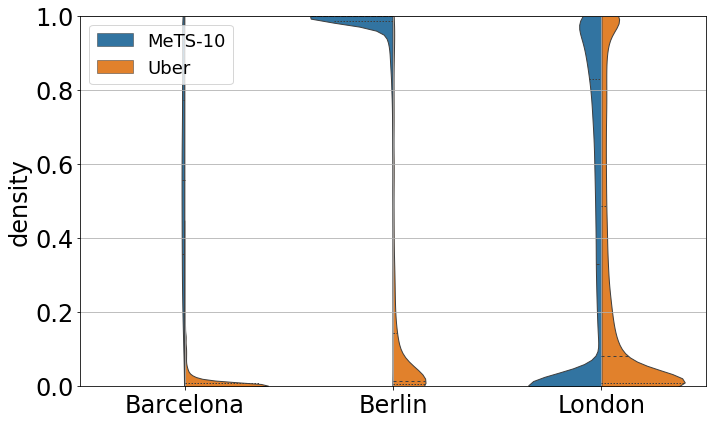

In [100]:
plt.rcParams["axes.labelsize"] = 24
fig, ax = plt.subplots(1, tight_layout=True, figsize=(10, 6), sharex=True)

data_split_t = df_all.copy()
data_split_u = df_all.copy()
data_split_u["density"] = data_split_u["density_u"]
data_split_u["src"]="Uber"
data_split_t["density"] = data_split_t["density_t"]
data_split_t["src"]="MeTS-10"
data_split = pd.concat([data_split_t,data_split_u])

sns.violinplot(data=data_split, y="density", x="city", hue="src",
               split=True, inner="quart", linewidth=1,
              )

ax.set_ylim([0.0, 1.0])
ax.set(xlabel="")
ax.tick_params(axis="x", which="major", labelsize=24, rotation=0)
ax.tick_params(axis="y", which="major", labelsize=24)
ax.grid()
plt.legend(fontsize=18)
plt.savefig(f"uber03_spatial_coverage_city_comparison_no_bb_density_u_density_t.pdf")

Index(['gkey', 'u', 'v', 'osmid', 'speed_kph', 'maxspeed', 'highway', 'oneway',
       'lanes', 'tunnel', 'length_meters', 'geometry', 'name', 'node_id',
       'x_u', 'y_u', 'node_id_v', 'x_v', 'y_v', 'in_bb', 'count_t',
       'median_speed_kph', 'mean_volume', 'density_t', 'osmid_u',
       'speed_kph_u', 'maxspeed_u', 'highway_u', 'oneway_u', 'lanes_u',
       'tunnel_u', 'length_meters_u', 'name_u', 'node_id_u', 'x_u_u', 'y_u_u',
       'node_id_v_u', 'x_v_u', 'y_v_u', 'in_bb_u', 'count_u', 'speed_kph_mean',
       'density_u', 'density_diff', 'sort_key', 'city', 'density', 'src'],
      dtype='object')


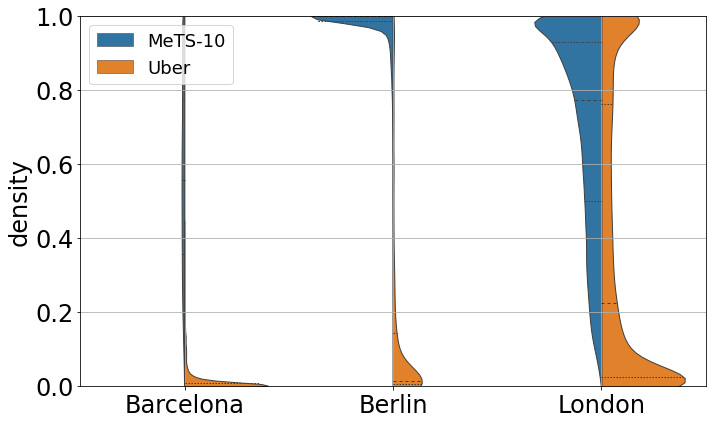

In [101]:
fig, ax = plt.subplots(1, tight_layout=True, figsize=(10, 6), sharex=True)

data_in_bb=df_all[df_all["in_bb"] == True]
data_in_bb_split_t = data_in_bb.copy()
data_in_bb_split_u = data_in_bb.copy()
data_in_bb_split_u["density"] = data_in_bb_split_u["density_u"]
data_in_bb_split_u["src"]="Uber"
data_in_bb_split_t["density"] = data_in_bb_split_t["density_t"]
data_in_bb_split_t["src"]="MeTS-10"
data_in_bb_split = pd.concat([data_in_bb_split_t,data_in_bb_split_u])
print(data_in_bb_split.columns)

sns.violinplot(data=data_in_bb_split, y="density", x="city", hue="src",
               split=True, inner="quart", linewidth=1,
              )

ax.set_ylim([0.0, 1.0])
ax.set(xlabel="")
ax.tick_params(axis="x", which="major", labelsize=24, rotation=0)
ax.tick_params(axis="y", which="major", labelsize=24)
ax.grid()
plt.legend(fontsize=18)
plt.savefig(f"uber03_spatial_coverage_city_comparison_bb_density_u_density_t.pdf")

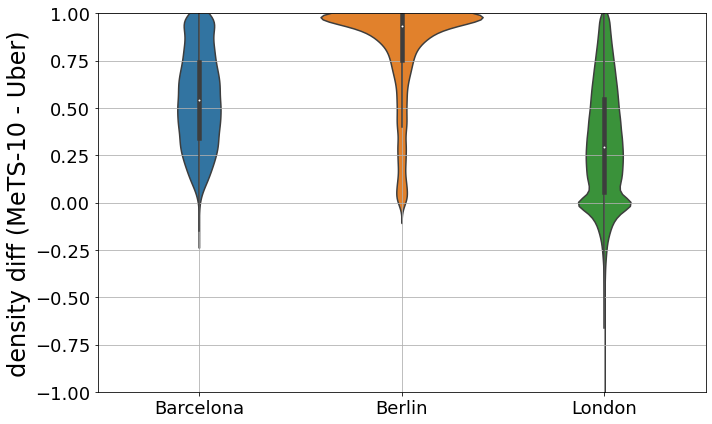

In [99]:
fig, ax = plt.subplots(1, tight_layout=True, figsize=(10, 6))
# sns.histplot(data=df_all[df_all["in_bb"]==True],x="density_diff", hue="city", ax=ax, element="step",
#    stat="density", common_norm=True, )
# ax.set_yscale('log')
sns.violinplot(
    data=df_all[df_all["in_bb"] == True],
    y="density_diff",
    x="city",
    ax=ax,
    # element="step",    stat="density", common_norm=True,
)
ax.grid()
ax.set_ylim([-1.0, 1.0])
ax.tick_params(axis="x", which="major", labelsize=18, rotation=0)
ax.tick_params(axis="y", which="major", labelsize=18)
ax.set(ylabel="density diff (MeTS-10 - Uber)", xlabel="")
# plt.savefig(f"uber03_spatial_coverage_city_comparison_bb.pdf")

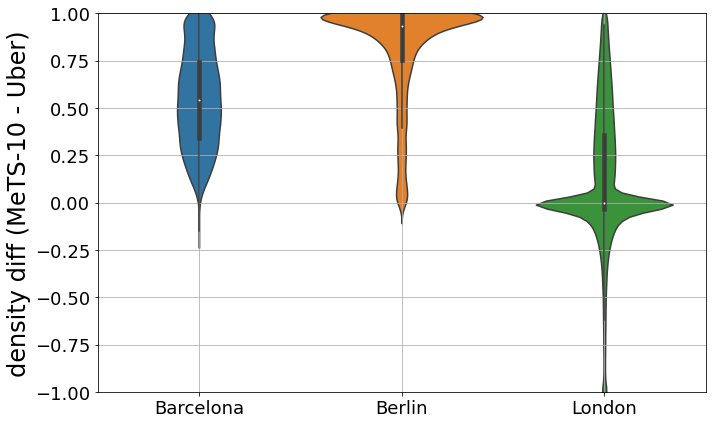

In [76]:
fig, ax = plt.subplots(1, tight_layout=True, figsize=(10, 6))
# sns.histplot(data=df_all[df_all["in_bb"]==True],x="density_diff", hue="city", ax=ax, element="step",
#    stat="density", common_norm=True, )
# ax.set_yscale('log')
sns.violinplot(
    data=df_all,
    y="density_diff",
    x="city",
    ax=ax,
    # element="step",    stat="density", common_norm=True,
)
ax.grid()
ax.set_ylim([-1.0, 1.0])
ax.tick_params(axis="x", which="major", labelsize=18, rotation=0)
ax.tick_params(axis="y", which="major", labelsize=18)
ax.set(ylabel="density diff (MeTS-10 - Uber)", xlabel="")
# plt.savefig(f"uber03_spatial_coverage_city_comparison_no_bb.pdf")

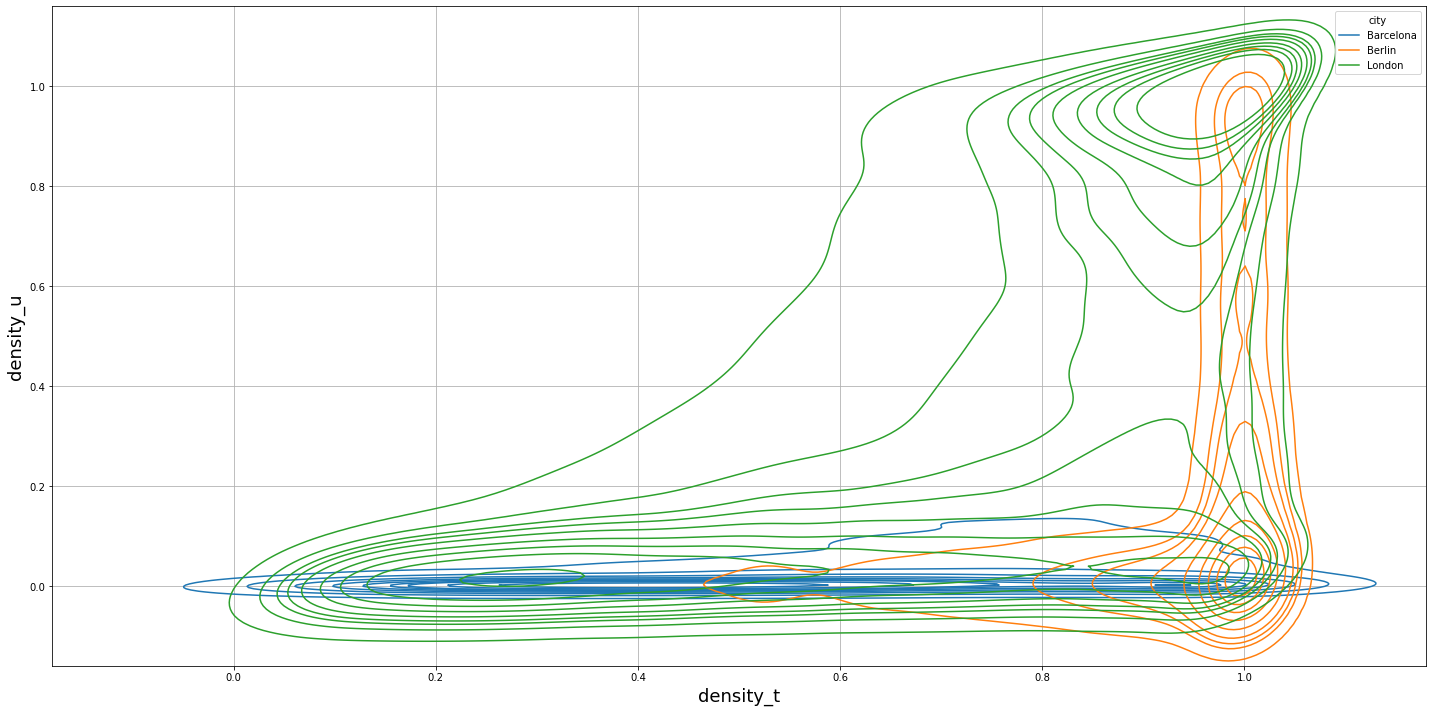

In [19]:
fig, ax = plt.subplots(1, tight_layout=True, figsize=(20, 10))
sns.kdeplot(
    data=df_all[df_all["in_bb"] == True],
    x="density_t",
    y="density_u",
    ax=ax,
    hue="city",
    common_norm=False
    # element="step",    stat="density", common_norm=True,
)
ax.grid()
# plt.savefig(f"uber03_spatial_coverage_city_comparison_bb.pdf")

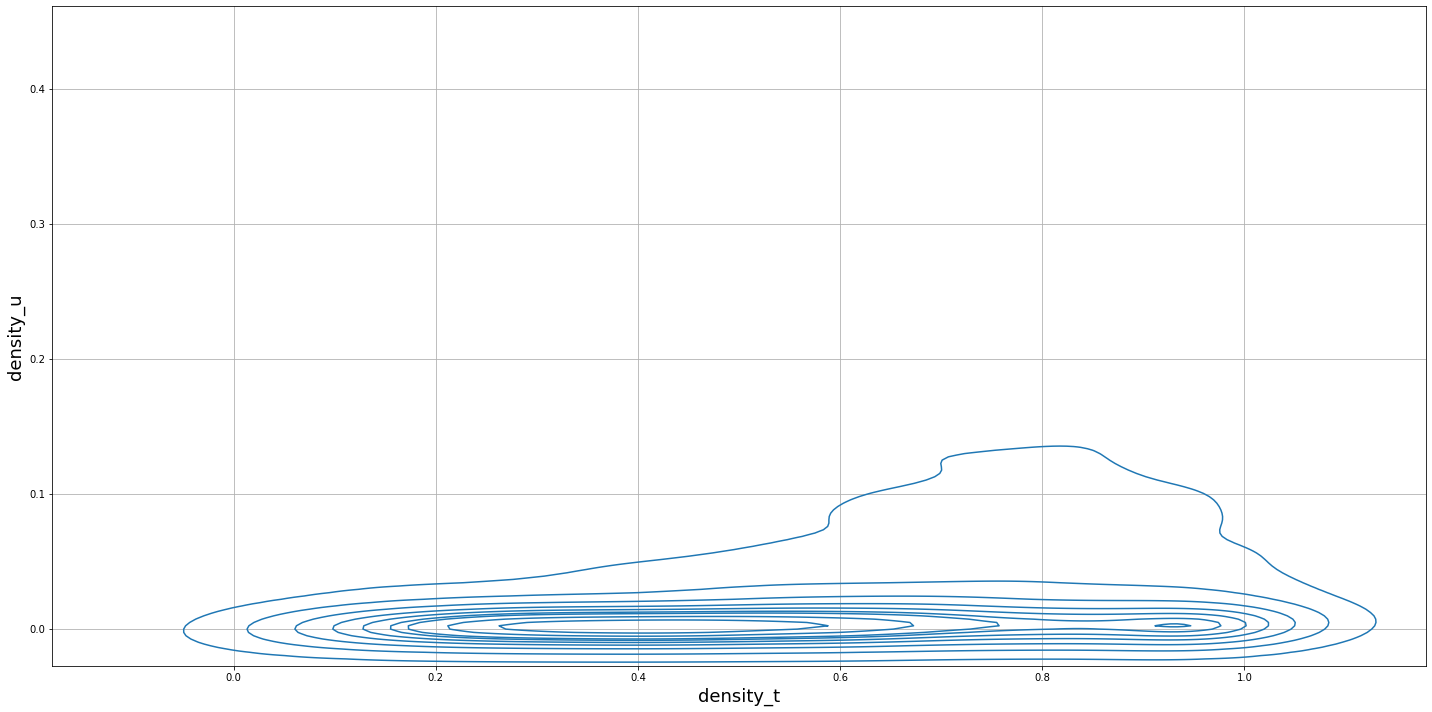

In [20]:
fig, ax = plt.subplots(1, tight_layout=True, figsize=(20, 10))
sns.kdeplot(
    data=df_barcelona[df_barcelona["in_bb"] == True],
    x="density_t",
    y="density_u",
    ax=ax,
    # element="step",    stat="density", common_norm=True,
)
ax.grid()
# plt.savefig(f"uber03_spatial_coverage_city_comparison_bb.pdf")

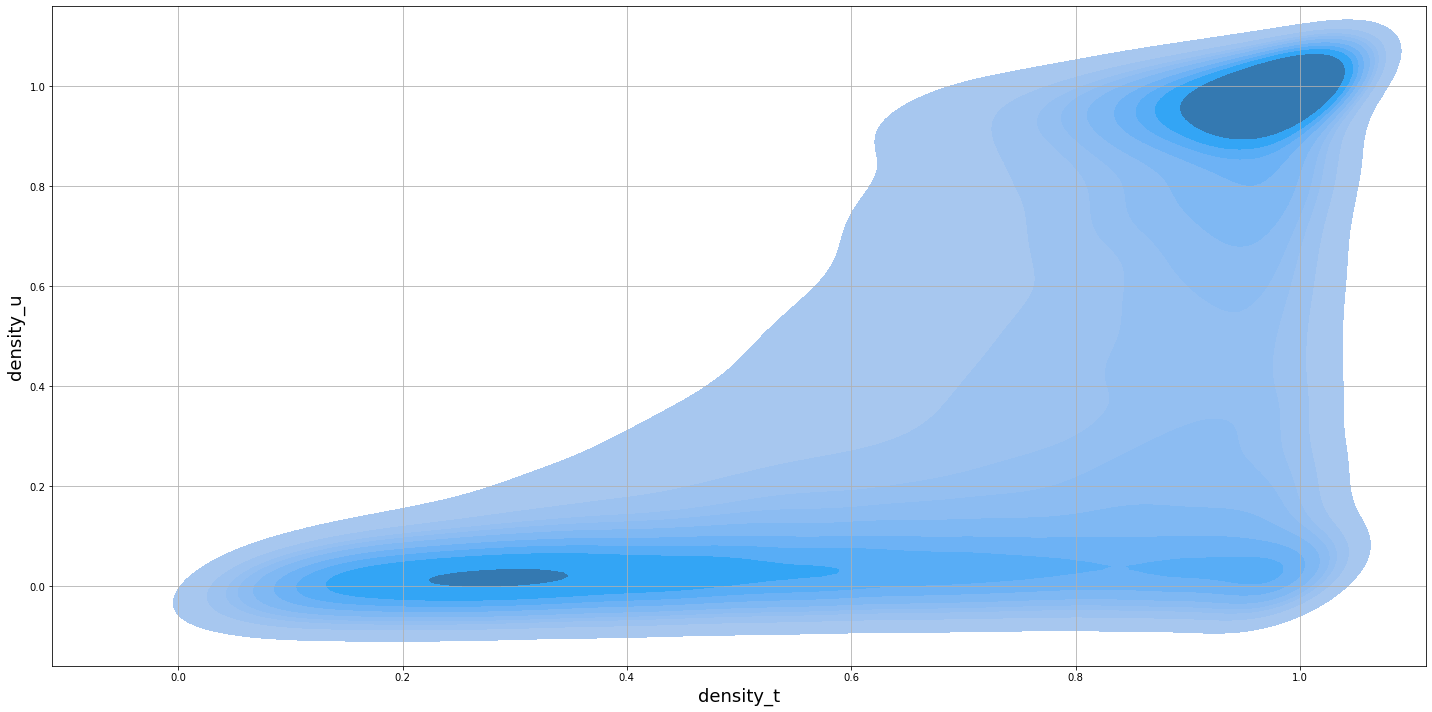

In [21]:
fig, ax = plt.subplots(1, tight_layout=True, figsize=(20, 10))
sns.kdeplot(data=df_london[df_london["in_bb"] == True], x="density_t", y="density_u", ax=ax, fill=True)
ax.grid()
# plt.savefig(f"uber03_spatial_coverage_city_comparison_bb.pdf")

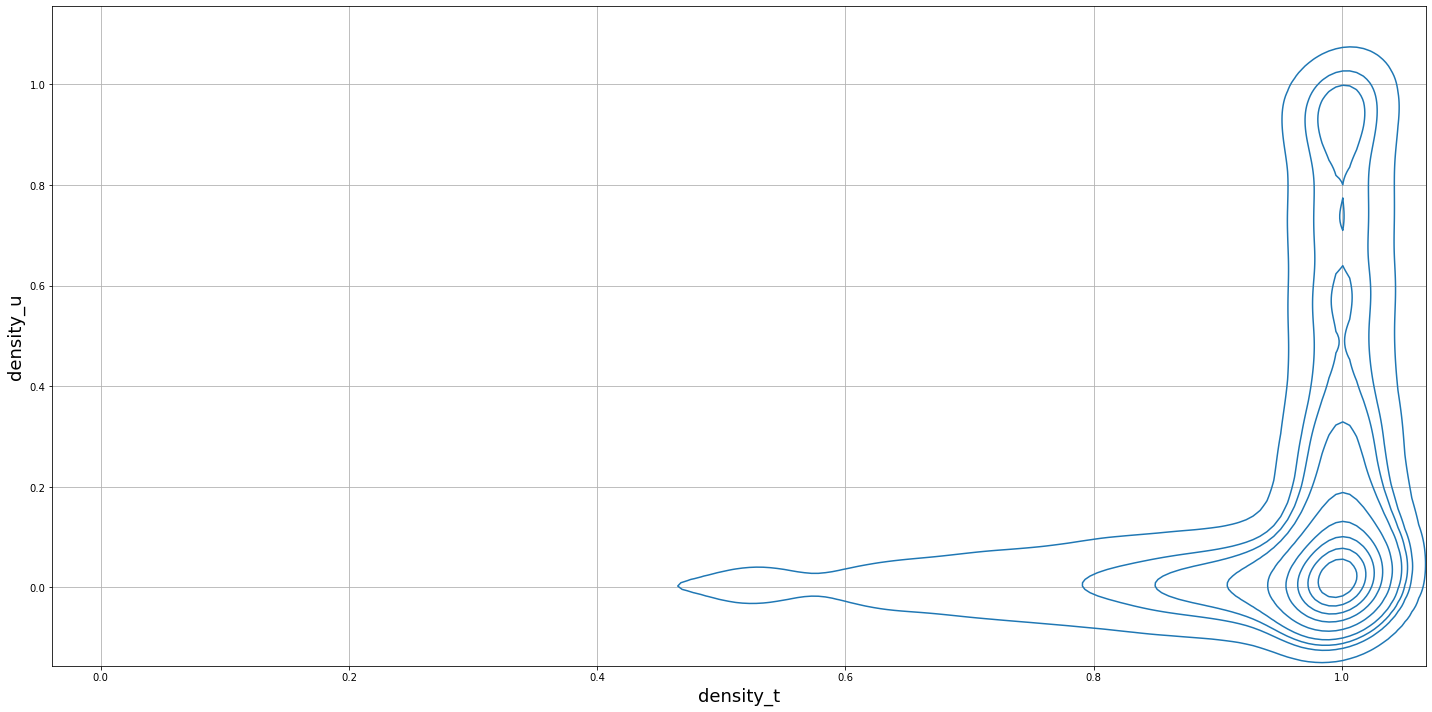

In [22]:
fig, ax = plt.subplots(1, tight_layout=True, figsize=(20, 10))
sns.kdeplot(
    data=df_berlin[df_berlin["in_bb"] == True],
    x="density_t",
    y="density_u",
    ax=ax,
    # element="step",    stat="density", common_norm=True,
)
ax.grid()
# plt.savefig(f"uber03_spatial_coverage_city_comparison_bb.pdf")

## Closer Look at London...

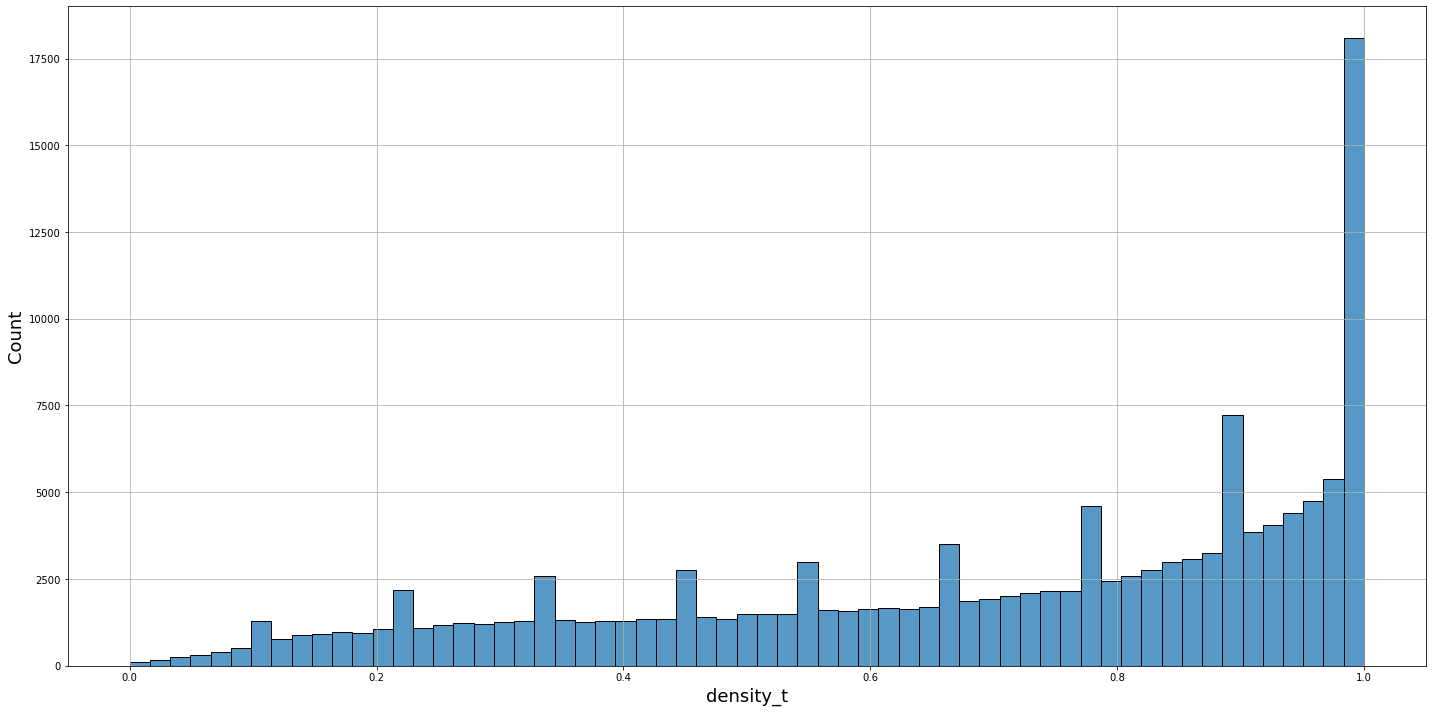

In [23]:
fig, ax = plt.subplots(1, tight_layout=True, figsize=(20, 10))
sns.histplot(
    data=df_london[df_london["in_bb"] == True],
    x="density_t",
    ax=ax,
    # element="step",    stat="density", common_norm=True,
)
ax.grid()
# ax.set_ylim([-1.0,1.0])
# plt.savefig(f"uber03_spatial_coverage_city_comparison_london.pdf")

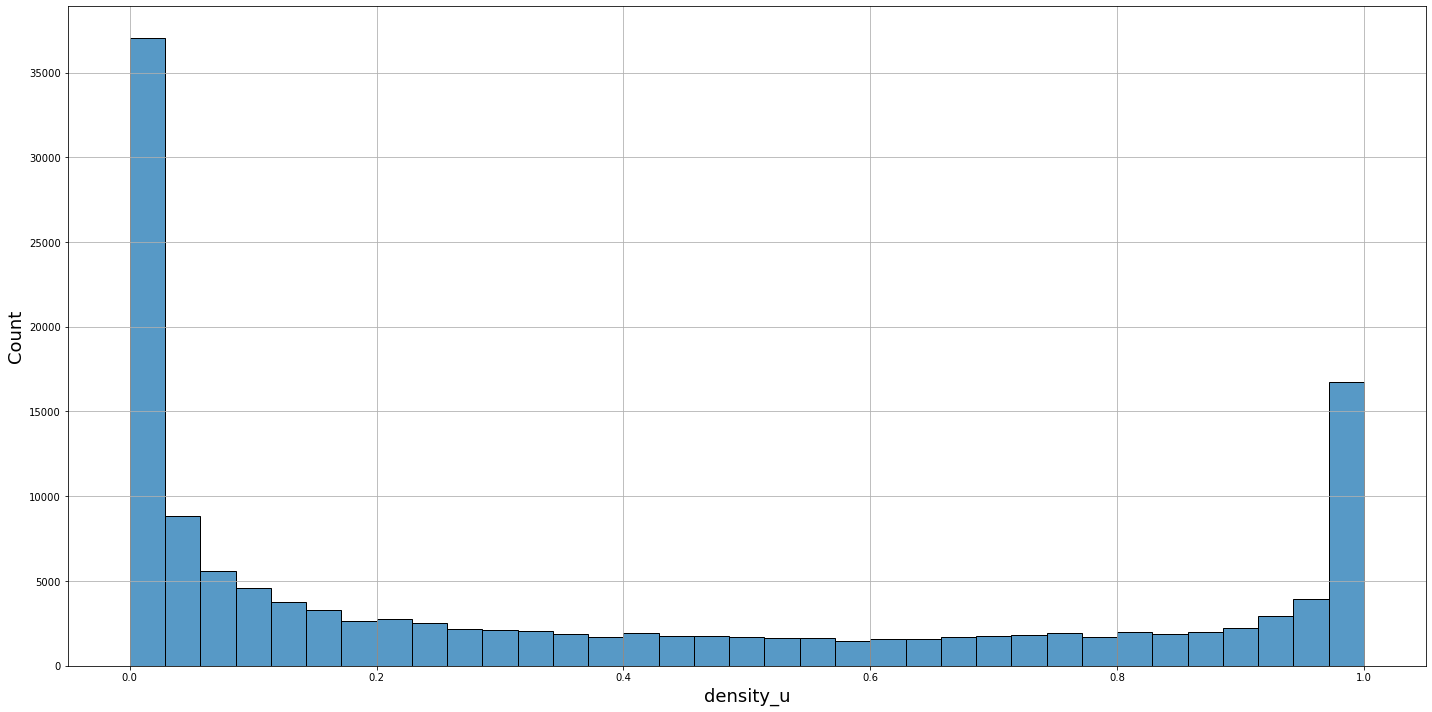

In [24]:
fig, ax = plt.subplots(1, tight_layout=True, figsize=(20, 10))
sns.histplot(
    data=df_london[df_london["in_bb"] == True],
    x="density_u",
    ax=ax,
    # element="step",    stat="density", common_norm=True,
)
ax.grid()
# ax.set_ylim([-1.0,1.0])
# plt.savefig(f"uber03_spatial_coverage_city_comparison_london.pdf")

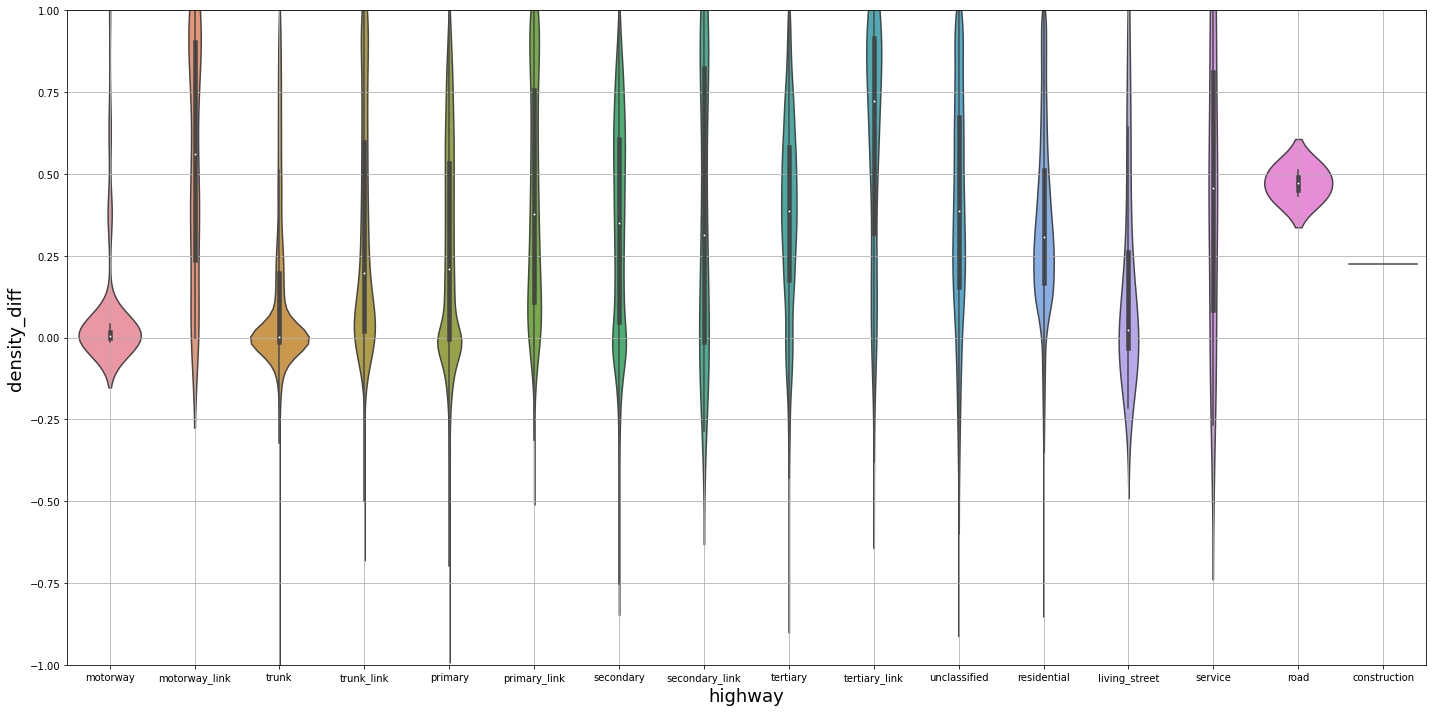

In [25]:
fig, ax = plt.subplots(1, tight_layout=True, figsize=(20, 10))
sns.violinplot(
    data=df_london[df_london["in_bb"] == True],
    y="density_diff",
    x="highway",
    ax=ax,
    # element="step",    stat="density", common_norm=True,
)
ax.grid()
ax.set_ylim([-1.0, 1.0])
plt.savefig(f"uber03_spatial_coverage_city_comparison_london.pdf")

In [27]:
df_london_outliers = df_london[(df_london["density_diff"] < -0.25) & (df_london["in_bb"] == True)]
df_london_outliers

,gkey,u,v,osmid,speed_kph,maxspeed,highway,oneway,lanes,tunnel,...,node_id_v_u,x_v_u,y_v_u,in_bb_u,count_u,speed_kph_mean,density_u,density_diff,sort_key,city
13555,275429_2354955632_226741490,275429,2354955632,226741490,48.3,30 mph,trunk,,,,...,2354955632,-0.167189,51.518281,True,310.0,33.113780,1.000000,-0.314286,2,London
13562,275431_1635822070_609340996,275431,1635822070,609340996,48.3,30 mph,trunk,,,,...,1635822070,-0.165793,51.519891,True,310.0,10.378634,1.000000,-0.314286,2,London
13566,252716890_2496856286_66789462,252716890,2496856286,66789462,48.3,30 mph,trunk,,,,...,2496856286,-0.165844,51.519709,True,310.0,16.318708,1.000000,-0.300000,2,London
84821,27364351_27364350_622551251,27364351,27364350,622551251,48.3,30 mph,trunk,,,,...,27364350,-0.084775,51.575803,True,302.0,43.920498,0.974194,-0.402765,2,London
178089,654181232_2872832566_283421288,654181232,2872832566,283421288,32.2,20 mph,trunk,,,,...,2872832566,-0.076039,51.544250,True,216.0,26.061652,0.696774,-0.382488,2,London
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196904,1621375315_1621375312_149115957,1621375315,1621375312,149115957,36.3,,residential,,,,...,1621375312,-0.185833,51.534359,True,290.0,24.956035,0.935484,-0.364055,11,London
196860,1621375312_1621375301_172589425,1621375312,1621375301,172589425,36.3,,residential,,,,...,1621375301,-0.184172,51.532965,True,272.0,30.136501,0.877419,-0.305991,11,London
196751,1619521324_1619521322_148893350,1619521324,1619521322,148893350,32.2,20 mph,residential,,,,...,1619521322,-0.192586,51.539106,True,238.0,18.280493,0.767742,-0.353456,11,London
116414,4070142095_27554795_404745888,4070142095,27554795,404745888,32.2,20 mph,residential,,,,...,27554795,-0.134662,51.530864,True,250.0,15.158373,0.806452,-0.606452,11,London


In [28]:
df_london_outliers.groupby("highway").mean()[["length_meters"]]

,length_meters
highway,
primary,34.236852
primary_link,19.417660
residential,52.539744
secondary,41.441756
secondary_link,9.485260
service,105.969504
tertiary,45.180936
tertiary_link,27.997925
trunk,21.332179


In [29]:
df_london_outliers.groupby("highway").median()[["length_meters"]]

,length_meters
highway,
primary,24.330170
primary_link,19.417660
residential,46.751164
secondary,29.430346
secondary_link,7.312851
service,105.969504
tertiary,33.198565
tertiary_link,27.997925
trunk,13.137022


<AxesSubplot:ylabel='Count'>

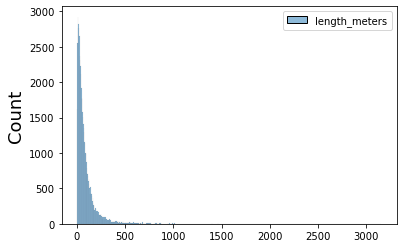

In [30]:
sns.histplot(df_london[df_london["highway"] == "primary"][["length_meters"]])

In [31]:
df_london[df_london["highway"] == "primary"][["length_meters"]].mean()

length_meters    91.03932
dtype: float64

In [32]:
df_london[df_london["highway"] == "primary"][["length_meters"]].median()

length_meters    54.977092
dtype: float64

<AxesSubplot:ylabel='Count'>

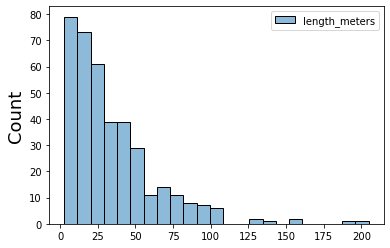

In [33]:
sns.histplot(df_london_outliers[df_london_outliers["highway"] == "primary"][["length_meters"]])

In [34]:
df_london_outliers[df_london_outliers["highway"] == "primary"][["length_meters"]].mean()

length_meters    34.236852
dtype: float64

In [35]:
df_london_outliers[df_london_outliers["highway"] == "primary"][["length_meters"]].median()

length_meters    24.33017
dtype: float64

In [36]:
df_london_outliers.groupby("highway").count()

,gkey,u,v,osmid,speed_kph,maxspeed,oneway,lanes,tunnel,length_meters,...,node_id_v_u,x_v_u,y_v_u,in_bb_u,count_u,speed_kph_mean,density_u,density_diff,sort_key,city
highway,,,,,,,,,,,,,,,,,,,,,
primary,384,384,384,384,384,384,384,384,384,384,...,384,384,384,384,384,384,384,384,384,384
primary_link,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
residential,445,445,445,445,445,445,445,445,445,445,...,445,445,445,445,445,445,445,445,445,445
secondary,254,254,254,254,254,254,254,254,254,254,...,254,254,254,254,254,254,254,254,254,254
secondary_link,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
service,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
tertiary,523,523,523,523,523,523,523,523,523,523,...,523,523,523,523,523,523,523,523,523,523
tertiary_link,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
trunk,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46


In [37]:
def show_marker_on_map(lat, lon, lat2, lon2):
    pt = (lat, lon)
    pt2 = (lat2, lon2)
    bb = [(lat - 0.001, lon - 0.001), (lat + 0.001, lon + 0.001)]
    f = folium.Figure(width=930, height=300)
    m = folium.Map().add_to(f)
    folium.Marker(pt).add_to(m)
    folium.Marker(pt2).add_to(m)
    # folium.PolyLine(line, weight=5, opacity=1).add_to(m)
    m.fit_bounds(bb)
    return m


def visualize_extreme_case(i):
    item = df_london_outliers[df_london_outliers["highway"] == "primary"].iloc[i]
    print(item)
    return show_marker_on_map(item["y_u"], item["x_u"], item["y_v"], item["x_v"])

In [38]:
visualize_extreme_case(0)

gkey                                     130192792_275069586_24704286
u                                                           130192792
v                                                           275069586
osmid                                                        24704286
speed_kph                                                        48.3
maxspeed                                                       30 mph
highway                                                       primary
oneway                                                               
lanes                                                                
tunnel                                                               
length_meters                                               92.344646
geometry            b'\x01\x02\x00\x00\x00\x02\x00\x00\x00\xd4\xda...
name                                                     Romford Road
node_id                                                     130192792
x_u                 

In [39]:
visualize_extreme_case(1)

gkey                                  1678368376_5297757637_155441590
u                                                          1678368376
v                                                          5297757637
osmid                                                       155441590
speed_kph                                                        48.3
maxspeed                                                       30 mph
highway                                                       primary
oneway                                                               
lanes                                                                
tunnel                                                               
length_meters                                              152.080976
geometry            b'\x01\x02\x00\x00\x00\x07\x00\x00\x00\x0c\xc5...
name                                                    North End Way
node_id                                                    1678368376
x_u                 

In [40]:
visualize_extreme_case(5)

gkey                                    25291667_4969376905_219982507
u                                                            25291667
v                                                          4969376905
osmid                                                       219982507
speed_kph                                                        48.3
maxspeed                                                       30 mph
highway                                                       primary
oneway                                                               
lanes                                                                
tunnel                                                               
length_meters                                               10.255462
geometry            b'\x01\x02\x00\x00\x00\x03\x00\x00\x00\x1b\xee...
name                                                   Sussex Gardens
node_id                                                      25291667
x_u                 

In [41]:
visualize_extreme_case(55)

gkey                                  2404735829_3373050954_232187426
u                                                          2404735829
v                                                          3373050954
osmid                                                       232187426
speed_kph                                                        64.4
maxspeed                                                       40 mph
highway                                                       primary
oneway                                                               
lanes                                                                
tunnel                                                               
length_meters                                               52.010164
geometry            b'\x01\x02\x00\x00\x00\x02\x00\x00\x00Q\x12\x1...
name                                                    Kingston Vale
node_id                                                    2404735829
x_u                 